In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('GM_Clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name der Klinik  1932 non-null   object
 1   Bewertung        1932 non-null   object
 2   Sternebewertung  1932 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 45.4+ KB


In [4]:
#Shuffle
df=df.sample(frac=1)

In [5]:
df.head()

,Name der Klinik,Bewertung,Sternebewertung
29,Herzogin Elisabeth Hospital,Auf mich macht das Krankenhaus einen ziemlich ...,2
1813,Elbe Klinikum Buxtehude,War heute morgen in der ZNA. So kurz habe ich ...,5
1096,AMEOS Klinikum Seepark Geestland,Hatte eine Ambulante Op...Es hieß nach 2 bis v...,3
1922,Diana Kliniken AG,War dort im Dez/2016 in der Neurologie. Wurde ...,5
360,St. Martini Krankenhaus,Mein Vater wird hier gut durch Dr. Passenberg ...,4


In [6]:
from sklearn.model_selection import train_test_split

Independent_var = df.Bewertung
Dependent_var = df.Sternebewertung

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.15, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 1642
IV_test  : 290
DV_train : 1642
DV_test  : 290


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [8]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 97,   7,   7,   4,  12],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  6,   3,   5,  25, 124]])

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.7620689655172413
Precision :  0.9248951338151599
Recall :  0.7620689655172413


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
example = ['Auf der G3B gibt es 1-2 Schwestern die absolut unfreundlich sind. Kommen ins Zimmer rein und legen eine Art an den Tag die einfach nur ne Frechheit ist. Sie motzen Leute grundlos an. Die anderen Schwestern und Pfleger dagegen sind ganz nett. Medizinisch auch in Ordnung. Ärzte jedoch teilweise überfordert. Keiner weiß so richtig was ein anderer vor hatte oder diagnostiziert hatte. Oftmals muss man dort den Ärzten selbst erklären was zutun ist.  Fazit: ein Krankenhaus in dem die Behandlung in Ordnung ist aber mehr auch nicht. Wohl hab ich mich dort nicht gefühlt. Gibt bessere Krankenhäuser in Niedersachsen.']
result = model.predict(example)

print(result)


[1]


In [11]:
df['Sternebewertung'].value_counts()

5    830
1    736
4    183
2    103
3     80
Name: Sternebewertung, dtype: int64

In [117]:
df.groupby(by=["Name der Klinik","Sternebewertung"]).count().head(25)

Bewertung
Name der Klinik                                    Sternebewertung           
AGAPLESION DIAKONIEKLINIKUM ROTENBURG gemeinnüt... 1                       65
                                                   2                       13
                                                   3                        7
                                                   4                       17
                                                   5                       61
AMEOS Klinikum Hildesheim                          1                       38
                                                   2                        2
                                                   3                        1
                                                   4                        1
                                                   5                       23
AMEOS Klinikum Seepark Geestland                   1                       15
                                                   2                        1
                                                   3                        8
                                                   4                        5
                                                   5                       18
DIAKOVERE Henriettenstift                          1                       38
                                                   2                        7
                                                   3                        6
                                                   4                       14
                                                   5                       33
Diana Kliniken AG                                  1                        5
                                                   2                        4
                                                   4                        2
                                                   5                       19
Eilenriede Klinik Hannover                         2                        1

array([<AxesSubplot:ylabel='Sternebewertung'>], dtype=object)

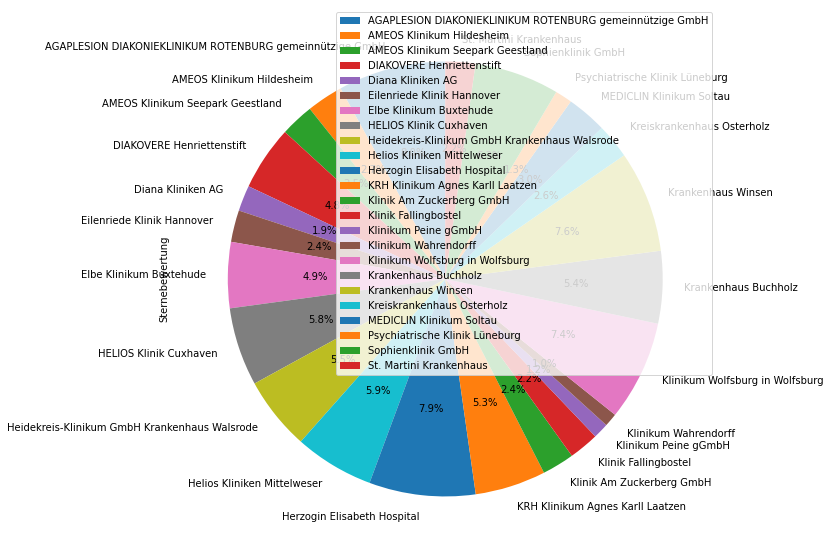

In [13]:
df.groupby(['Name der Klinik']).sum().plot(kind='pie', subplots=True, startangle=90,
figsize=(15,10), autopct='%1.1f%%')

Name der Klinik                                           Sternebewertung
AGAPLESION DIAKONIEKLINIKUM ROTENBURG gemeinnützige GmbH  1                  39.88
                                                          5                  37.42
                                                          4                  10.43
                                                          2                   7.98
                                                          3                   4.29
AMEOS Klinikum Hildesheim                                 1                  58.46
                                                          5                  35.38
                                                          2                   3.08
                                                          3                   1.54
                                                          4                   1.54
AMEOS Klinikum Seepark Geestland                          5                  38.30
             

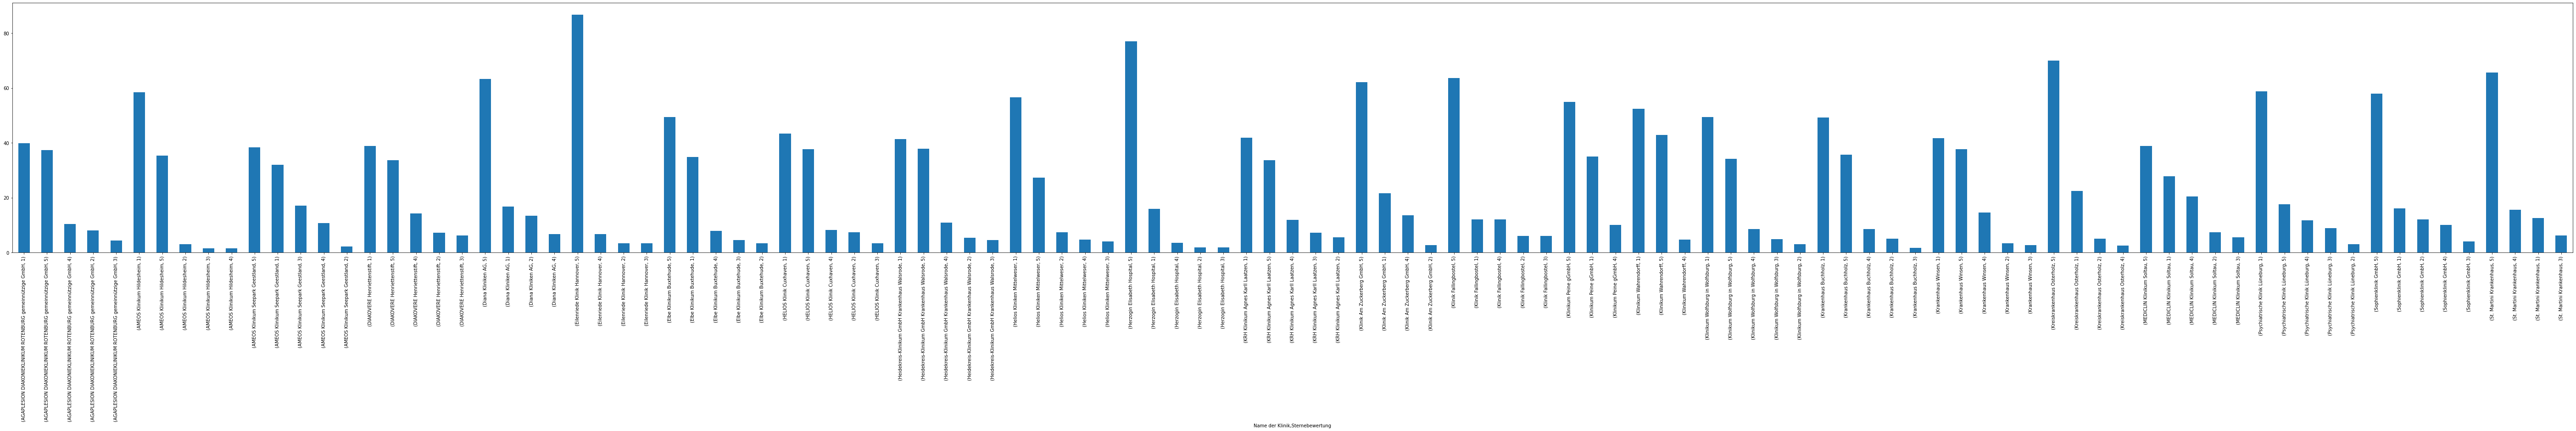

In [119]:
print(round(df.groupby('Name der Klinik').Sternebewertung.value_counts(normalize=True)*100,2).head(25))
round(df.groupby('Name der Klinik').Sternebewertung.value_counts(normalize=True)*100,2).plot(kind='bar',figsize=(100,10))
plt.show()